In [322]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import dates as mpl_dates
from datetime import datetime,timedelta
from collections import Counter

In [323]:
netflix_data = pd.read_csv("Netflix Userbase.csv")

In [324]:
netflix_data


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


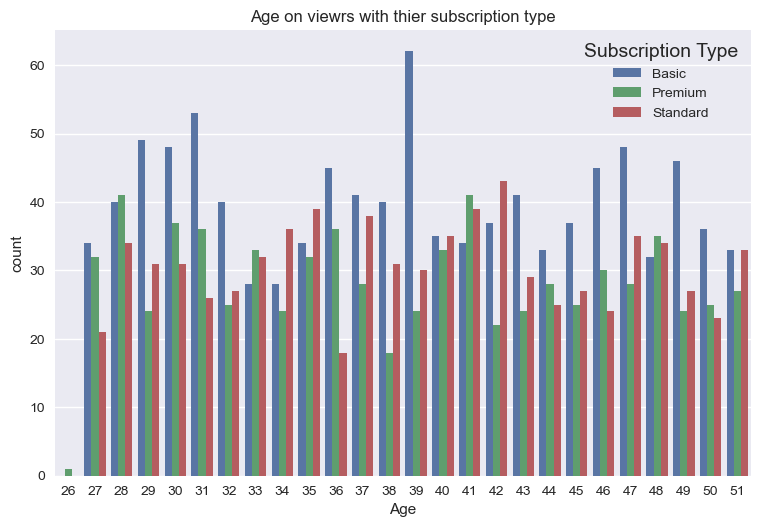

In [325]:
plt.title("Age on viewrs with thier subscription type")
sns.countplot(x= 'Age',hue = 'Subscription Type',data = netflix_data)
plt.show()

In [326]:
sub_type_count = netflix_data['Subscription Type'].value_counts()

In [327]:
sub_type_count

Basic       999
Standard    768
Premium     733
Name: Subscription Type, dtype: int64

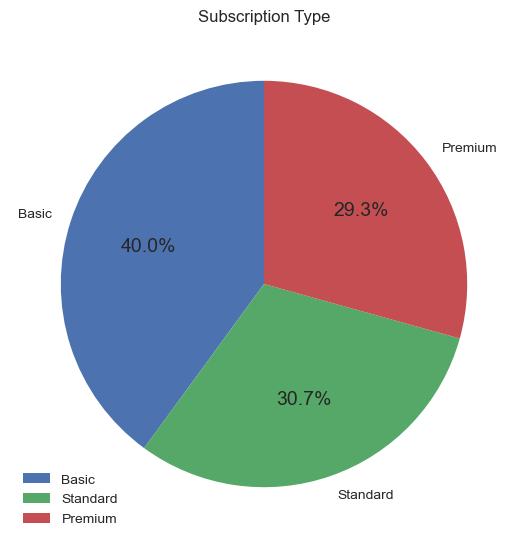

In [328]:
plt.style.use("seaborn")
labels = ['Basic','Standard','Premium']
plt.pie(sub_type_count, labels = labels, startangle = 90, autopct = "%1.1f%%")
plt.tight_layout()
plt.legend()
plt.title("Subscription Type")
plt.show()

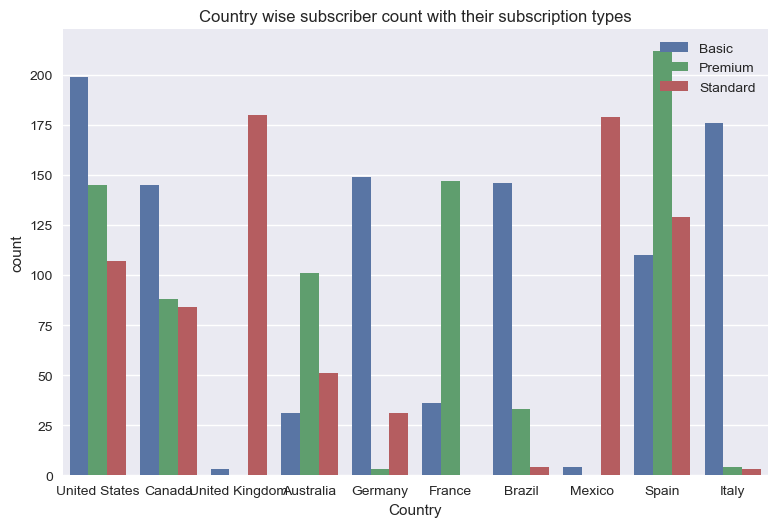

In [329]:
sns.countplot(x= 'Country',hue = 'Subscription Type',data = netflix_data)
plt.legend()
plt.title("Country wise subscriber count with their subscription types")
plt.tight_layout()
plt.show()

In [330]:
device_counts = netflix_data['Device'].value_counts()
dev_counter = Counter(device_counts)
counter_dict = dict(dev_counter)
counter_dict.update({636:'Laptop',633:'Tablet',621:'Smartphone',610:'Smart TV'})
counter_dict_keys = counter_dict.keys()
counter_dict_values = counter_dict.values()

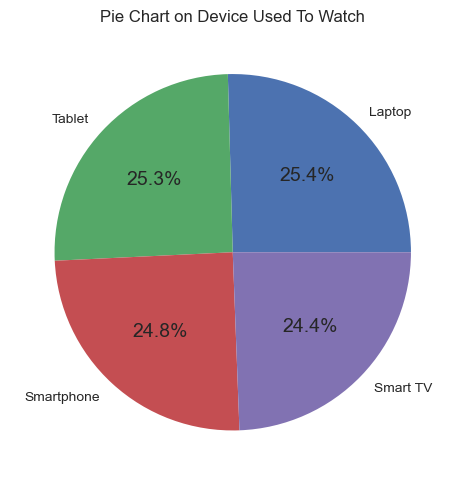

In [331]:
plt.style.use("seaborn")
#plt.bar(counter_dict_values,counter_dict_keys,width = 0.5)
plt.title('Pie Chart on Device Used To Watch')
plt.pie(counter_dict_keys,labels = counter_dict_values, autopct = "%1.1f%%")
plt.show()

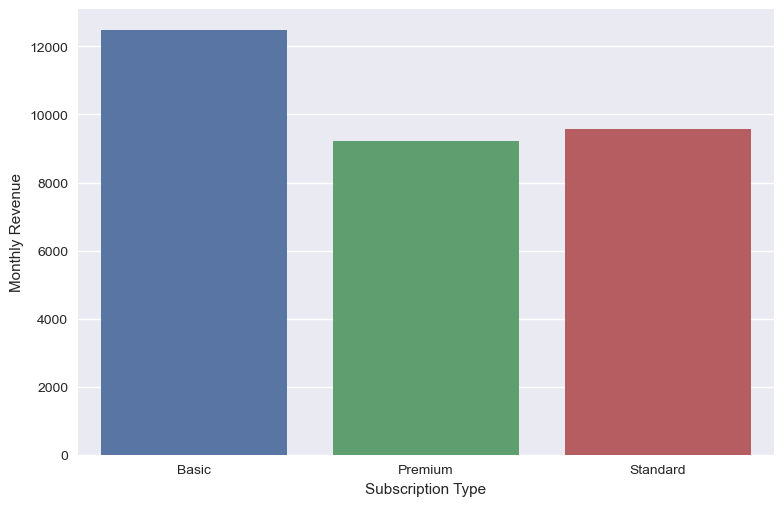

In [332]:
sm = netflix_data.groupby('Subscription Type').sum().reset_index()
sns.barplot(data=sm,x='Subscription Type', y='Monthly Revenue')
plt.show()

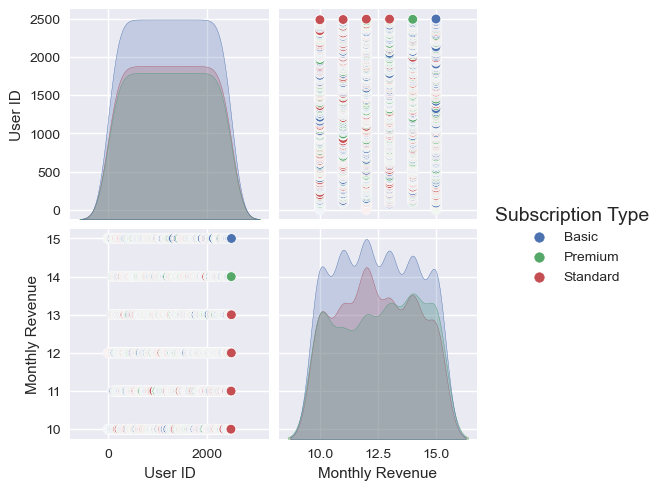

In [334]:
sns.pairplot(netflix_data, hue = "Subscription Type")

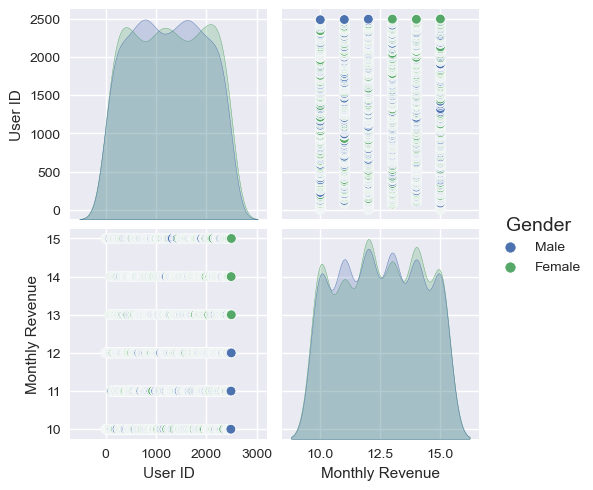

In [335]:
sns.pairplot(netflix_data, hue = "Gender")

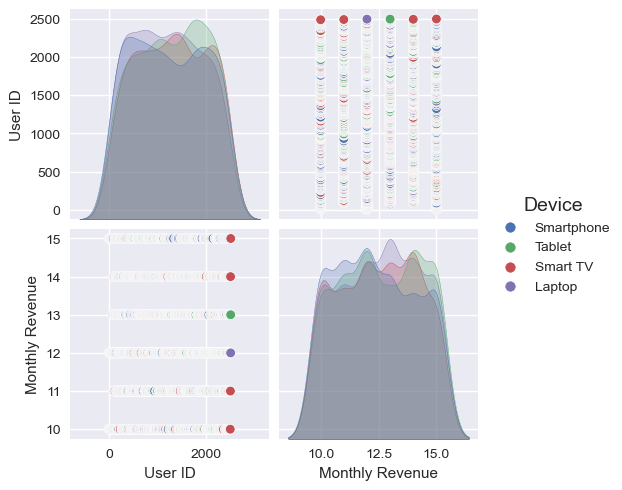

In [336]:
sns.pairplot(netflix_data, hue = "Device")

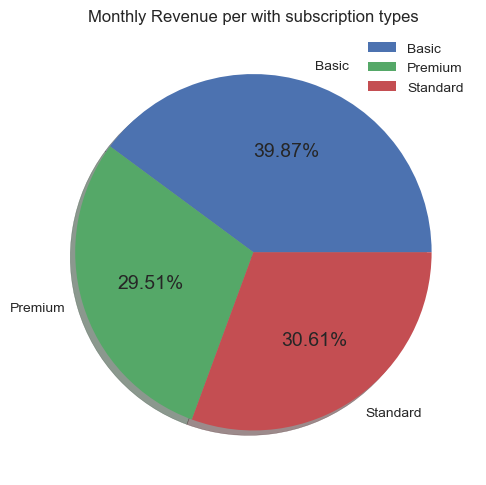

In [337]:
revenue_by_subs = netflix_data.groupby('Subscription Type')['Monthly Revenue'].sum().reset_index()
plt.pie(revenue_by_subs["Monthly Revenue"], labels = revenue_by_subs["Subscription Type"], autopct = "%1.2f%%", shadow = True)
plt.legend()
plt.title("Monthly Revenue per with subscription types")
plt.show()

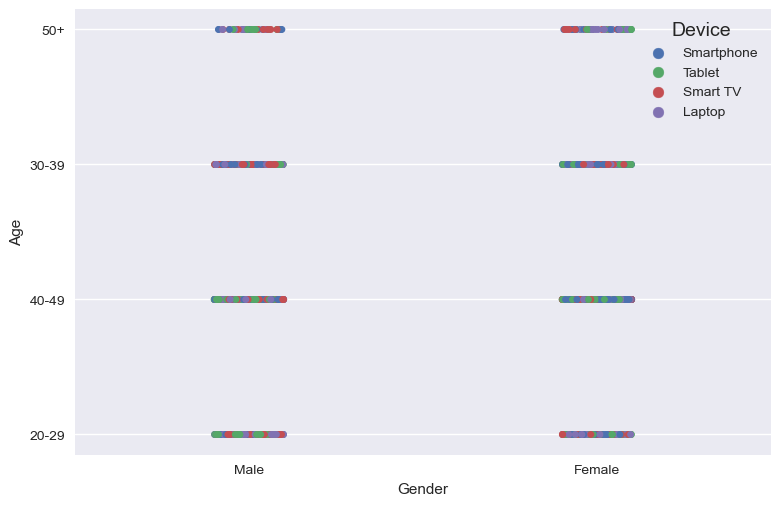

In [338]:
sns.stripplot(x = "Gender", y = "Age", hue = "Device",jitter = 0.1, data = netflix_data)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 87.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 87.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


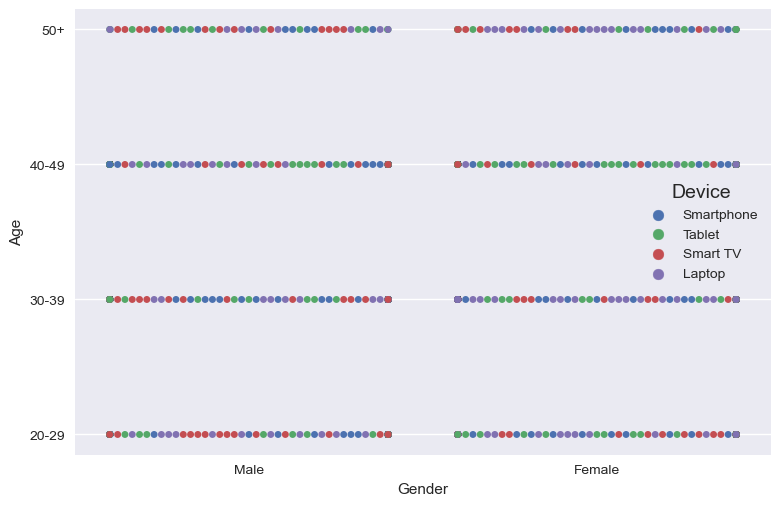

In [339]:
sns.swarmplot(x = "Gender", y = "Age", hue = "Device", data = netflix_data)
plt.show()

In [340]:
netflix_data['Date'] = pd.to_datetime(netflix_data['Join Date'])
netflix_data.sort_values('Join Date', inplace = True)
join_date = netflix_data['Join Date']

netflix_data['Date'] = pd.to_datetime(netflix_data['Last Payment Date'])
netflix_data.sort_values('Last Payment Date', inplace = True)
date_last = netflix_data['Last Payment Date']

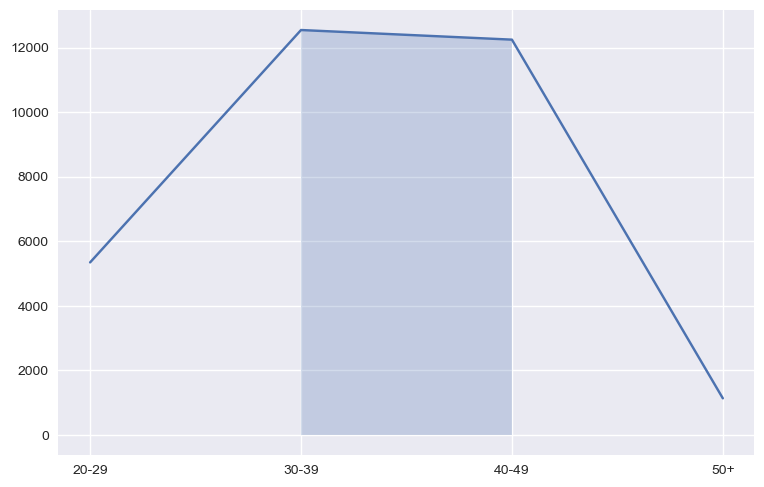

In [341]:
revenue_by_age = netflix_data.groupby('Age')['Monthly Revenue'].sum().reset_index()
plt.plot(revenue_by_age['Age'],revenue_by_age['Monthly Revenue'])
rba_median = 8795.5
plt.fill_between(revenue_by_age['Age'],revenue_by_age['Monthly Revenue'],where = (revenue_by_age['Monthly Revenue']>rba_median),alpha = 0.25, label = "Above_Avg")
plt.fill_between(revenue_by_age['Age'],revenue_by_age['Monthly Revenue'],where = (revenue_by_age['Monthly Revenue']<=rba_median),alpha = 0.25,label = "Below_Avg")
plt.show()